# Linear Regression with Python Scikit Learn
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

## Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [10]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

In [3]:
# Reading data from remote link
url = "http://bit.ly/w-data"
student_data = pd.read_csv(url)
print("Data imported successfully")

student_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

## checking for null values

In [4]:
student_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
student_data.shape

(25, 2)

## Exploratory data analysis

### finding correlation between the variables

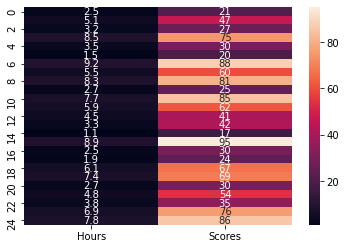

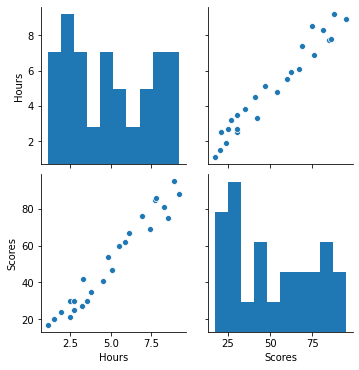

In [14]:
student_corr= student_data.corr()
sns.heatmap(student_data, annot= True)
sns.pairplot(student_data)

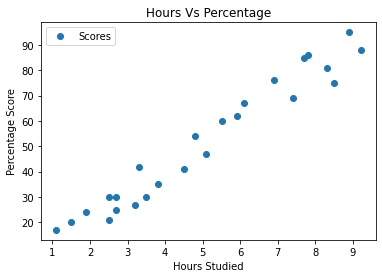

In [16]:
# Plotting the distribution of scores
student_data.plot(x='Hours', y='Scores', style='o')
plt.title("Hours Vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

In the above graph, we got a line with a positive slope. So, we can conclude that there is a positive linear relation between the hours of studies and percentage of score.

## Preparing the data
In the next step, lets divide the data into "attributes"(input) and "labels"(outputs)

In [17]:
X= student_data.iloc[:,:-1].values
Y= student_data.iloc[:,1].values

Now we will split the "attributes" and "labels" data into sets of training and testing by using train_test_split() method of Scikit-Learn

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2, random_state=0)

## Training the algorithm
After spliting our data ito training and testing set, now we will test the algorithm.

In [19]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)
print("Training complete.")

Training complete.


### The co-efficient and intercept of the model

In [20]:
print("Co-efficient:",regressor.coef_)
print("Intercept:",regressor.intercept_)

Co-efficient: [9.91065648]
Intercept: 2.018160041434683


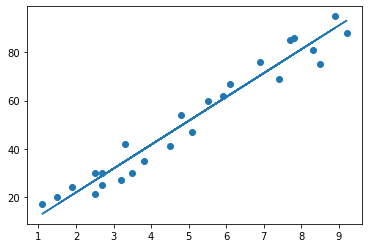

In [24]:
# plotting the regression line
line=regressor.coef_*X+regressor.intercept_

#Plotting for the test data
plt.scatter(X,Y)
plt.plot(X,line);
plt.show()

## Making Predictions
Now its time to make the prediction, after training the algorithm.

In [25]:
print(X_test) # Testing data- In hours
Y_pred= regressor.predict(X_test) #predicting the score

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [27]:
# Comparing Actual Vs Predicted
df= pd.DataFrame({'Actual': Y_test,'Predicted': Y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [31]:
# Time to test for the given data
hours=np.array(9.25)
hours=hours.reshape(-1,1)
own_pred= regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predict Score = {}". format(own_pred[0]))

No of Hours = [[9.25]]
Predict Score = 93.69173248737538


## Evaluating the model
Finally we would evaluate our algorithm. Here we have chosen R-square error evaluation method along with the Mean Absolute Error method 

In [33]:
from sklearn import metrics
print('R-square error :',
     metrics.r2_score(Y_test, Y_pred))  # Evaluation by R-Square Method

print('Mean Absolute Error :',
     metrics.mean_absolute_error(Y_test, Y_pred))  # Evaluation by Mean_Absolute_Error Method

R-square error : 0.9454906892105356
Mean Absolute Error : 4.183859899002975


## Our Linear regression model works with R-Square error of 0.94 and Mean absolute Error of 4.18